In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Vattenbalans Sverige
Man kan försöka undersöka vattenbalansen i Sverige (under ett rimligt tidsintervall) genom att hitta funktioner (m.h.a. minsta kvadratmetoden) för vattenuttag och vattentillgång, och sedan göra en for-loop som använder sig av ekvationen nedan (WEI+ är ett index på vattenbrist: värden över 20% = vattenbrist). (Problem att vi mäter WEI och inte WEI+)

$WEI = \frac{Vattenuttag}{Förnybart vatten}$

ekvationen: https://www.smhi.se/polopoly_fs/1.152541!/Hydrologi_120.pdf

### Vattenuttag kod och graf 

In [130]:
data = pd.read_csv("water-withdrawals-per-capita.csv", sep = ',')


vatten_uttag = data['water_withdrawal'].tolist()
x_ar = data['Year'].tolist()
print(vatten_uttag)


[501.5, 501.5, 493.3, 353.0, 342.6, 306.0, 300.3, 287.3, 281.8]


107.14335937500005


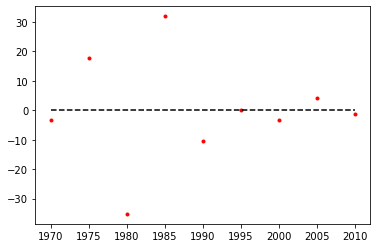

In [213]:
fit_coeffs = np.polyfit( x_ar , vatten_uttag, 5 ) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
x_1 = np.linspace(1970,2011, 41)
funklist = np.polyval(fit_coeffs, x_1)


Xu = np.zeros((len(x_ar),6))

Xu[:,1] = x_ar # Fick det inte att fungera på något smartare sätt
Xu[:,0] = 1
Xu[:,2] = x_ar
Xu[:,3] = x_ar
Xu[:,4] = x_ar
Xu[:,5] = x_ar

for i in Xu:
    i[2] = i[2] **2
    i[3] = i[3] **3
    i[4] = i[4] **4
    i[5] = i[5] **5

ru = np.dot(Xu,fit_coeffs[::-1].T) - vatten_uttag  # [::-1] = Koefficienterna bakvänt
plt.plot(x_ar,ru,'.r')


summa = sum(map(abs, ru))
print(summa)

y = np.linspace(0,0,len(x_ar))
plt.plot(x_ar,y, '--k')

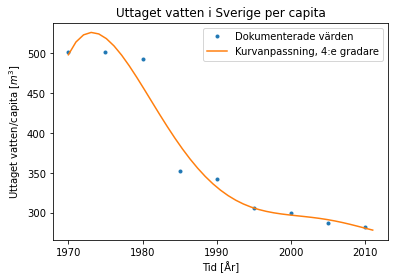

In [169]:
plt.plot(x_ar, vatten_uttag, '.', label="Dokumenterade värden")
plt.plot(x_1, funklist,label="Kurvanpassning, 5:e gradare")
plt.title('Uttaget vatten i Sverige per capita')
plt.ylabel("Uttaget vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

### Förnybara vattenresurser kod och graf

879.1063149071997


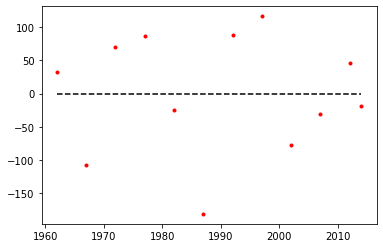

In [214]:
ddata = pd.read_csv("renewable-water-resources-per-capita.csv", sep=",")


vatten_tillgang = ddata['Renewable_freshwater'].tolist()
x_ar2 = ddata['Year'].tolist()

 
x_2 = np.linspace(1962, 2015, 53)
curvefit_2 = np.polyfit(x_ar2, vatten_tillgang, 5)
funklist_2 = np.polyval(curvefit_2, x_2)  

Xt = np.zeros((len(x_ar2),6))
Xt[:,0] = 1
Xt[:,1] = x_ar2 
Xt[:,2] = x_ar2
Xt[:,3] = x_ar2
Xt[:,4] = x_ar2
Xt[:,5] = x_ar2
#Xt[:,6] = x_ar2

for i in Xt:
    i[2] = i[2] **2
    i[3] = i[3] **3
    i[4] = i[4] **4
    i[5] = i[5] **5
    #i[6] = i[6] **6

rt = np.dot(Xt,curvefit_2[::-1].T) - vatten_tillgang
plt.plot(x_ar2,rt,'.r')
summa_tillgang = sum(map(abs, rt))
print(summa_tillgang)

y2 = np.linspace(0,0,len(x_ar2))
plt.plot(x_ar2,y2, '--k')


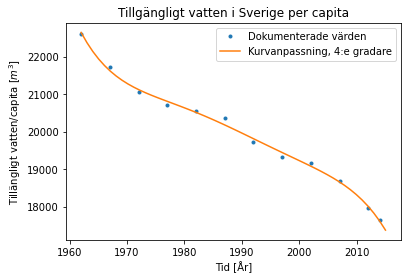

In [186]:
plt.plot(x_ar2, vatten_tillgang, ".", label="Dokumenterade värden")
plt.plot(x_2, funklist_2,label="Kurvanpassning, 5:e gradare" )
plt.title('Tillgängligt vatten i Sverige per capita')
plt.ylabel("Tillängligt vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

## WEI-index

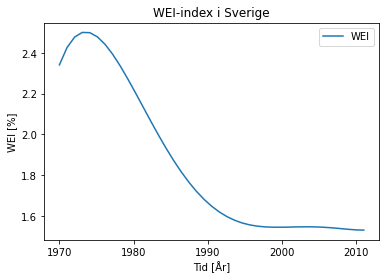

In [224]:
wei= funklist/funklist_2[8:-4]
weiprocent= wei*100
plt.title('WEI-index i Sverige')
plt.plot(x_1, weiprocent, label="WEI")
plt.ylabel("WEI [%]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()


## Vattenbalans i Libyen

## Vattenuttag kod och graf

In [26]:
data_l = pd.read_csv("water-withdrawals-per-capita_libya.csv", sep = ',')

vatten_uttag_l = data_l['water_withdrawal'].tolist()
x_ar_l = data_l['Year'].tolist()


124.25625000000002


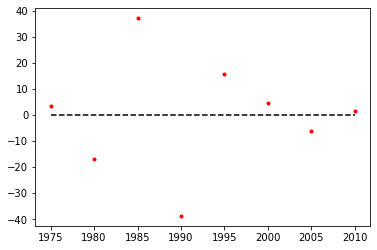

In [219]:
fit_coeffs_l = np.polyfit( x_ar_l , vatten_uttag_l , 5) # fjärde-gradens-polynom-anpassning f(x) = a + b*x + c*x**2 + d*x**3 + e*x**4
x_1_l = np.linspace(x_ar_l[0],x_ar_l[-1],x_ar_l[-1]- x_ar_l[0])
funklist_l = np.polyval(fit_coeffs_l, x_1_l)

Xu_l = np.zeros((len(x_ar_l),6))

Xu_l[:,1] = x_ar_l 
Xu_l[:,0] = 1
Xu_l[:,2] = x_ar_l
Xu_l[:,3] = x_ar_l
Xu_l[:,4] = x_ar_l
Xu_l[:,5] = x_ar_l
#Xu_l[:,6] = x_ar_l

for i in Xu_l:
    i[2] = i[2] **2
    i[3] = i[3] **3
    i[4] = i[4] **4
    i[5] = i[5] **5
    #i[6] = i[6] **6

ru_l = np.dot(Xu_l,fit_coeffs_l[::-1].T) - vatten_uttag_l  # [::-1] = Koefficienterna bakvänt
plt.plot(x_ar_l,ru_l,'.r')
summa_l = sum(map(abs, ru_l))
print(summa_l)

y3 = np.linspace(0,0,len(x_ar_l))
plt.plot(x_ar_l,y3, '--k')

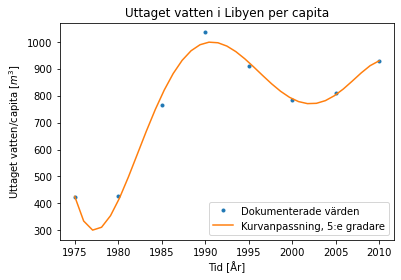

In [220]:
plt.plot(x_ar_l, vatten_uttag_l, '.', label="Dokumenterade värden")
plt.plot(x_1_l, funklist_l,label="Kurvanpassning, 5:e gradare")
plt.title('Uttaget vatten i Libyen per capita')
plt.ylabel("Uttaget vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()

## Förnybara vattenresurser kod och graf

3.4102087931897245


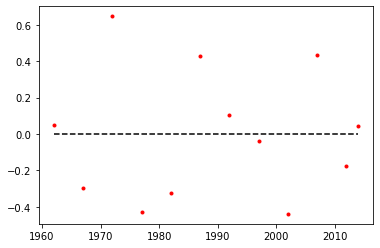

In [223]:
ddata_l = pd.read_csv("renewable-water-resources-per-capita_libya.csv", sep=",")

vatten_tillgang_l = ddata_l['Renewable_freshwater'].tolist()
x_ar2_l = ddata_l['Year'].tolist()
 
x_2_l = np.linspace(x_ar2_l[0], x_ar2_l[-1], x_ar2_l[-1]-x_ar2_l[0])
curvefit_2_l = np.polyfit(x_ar2_l, vatten_tillgang_l, 5)
funklist_2_l = np.polyval(curvefit_2_l, x_2_l) 


Xt_l = np.zeros((len(x_ar2_l),6))
Xt_l[:,0] = 1
Xt_l[:,1] = x_ar2_l
Xt_l[:,2] = x_ar2_l
Xt_l[:,3] = x_ar2_l
Xt_l[:,4] = x_ar2_l
Xt_l[:,5] = x_ar2_l
#Xt_l[:,6] = x_ar2_l

for i in Xt_l:
    i[2] = i[2] **2
    i[3] = i[3] **3
    i[4] = i[4] **4
    i[5] = i[5] **5
    #i[6] = i[6] **6

rt_l = np.dot(Xt_l,curvefit_2_l[::-1].T) - vatten_tillgang_l
plt.plot(x_ar2_l,rt_l,'.r')

summa_tillgang_l = sum(map(abs, rt_l))
print(summa_tillgang_l)

y4 = np.linspace(0,0,len(x_ar2_l))
plt.plot(x_ar2_l,y4, '--k')



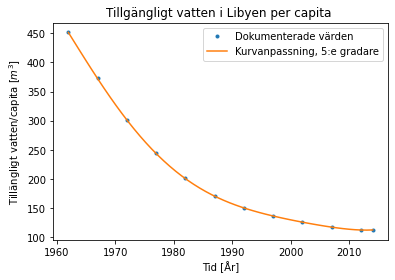

In [205]:
plt.plot(x_ar2_l, vatten_tillgang_l, ".", label="Dokumenterade värden")
plt.plot(x_2_l, funklist_2_l,label="Kurvanpassning, 5:e gradare" )
plt.title('Tillgängligt vatten i Libyen per capita ')
plt.ylabel("Tillängligt vatten/capita [$m^3$]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()


## WEI-index

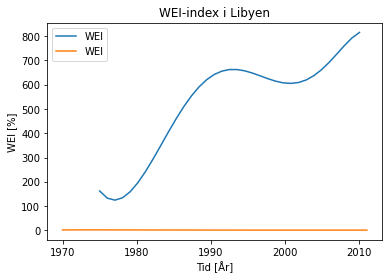

In [225]:
wei= funklist_l/funklist_2_l[13:-4]
weiprocent_l= wei*100
plt.plot(x_1_l, weiprocent_l, label="WEI")
plt.title('WEI-index i Libyen')
plt.ylabel("WEI [%]")
plt.xlabel("Tid [År]")
plt.legend()
plt.show()